# Sobre as anotações
Esses códigos foram realizados junto ao curso disponível no kaggle: https://www.kaggle.com/learn/data-cleaning

Para melhor contextualização, basta acessar minhas anotações pessoais realizadas ao longo do curso: https://docs.google.com/document/d/1UZBWbrb9XTxueuLO1kAIBJaduiI6eSpC4qqe9s81OW0/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd

# Primeiros passos

## Importação dos dados

In [2]:
nfl = r"C:\Users\marco\Dropbox\PC\Desktop\NFL Play by Play 2009-2016 (v3).csv"

In [3]:
dados = pd.read_csv(nfl, low_memory=False)
dados.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


### Contando valores nulos

In [4]:
#Apenas para as primeiras 10 colunas
valores_faltantes = dados.isnull().sum()
valores_faltantes[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

### Identificando a % dos valores faltantes em toda o DataFrame

In [5]:
celulas_totais = np.product(dados.shape)
contagem_valores_faltantes = valores_faltantes.sum()
print(f'Valores faltantes: {(contagem_valores_faltantes/celulas_totais)*100:.2f}%')

Valores faltantes: 24.86%


### Elimitando registros que apresentem dados nulos

In [6]:
sem_na = dados.dropna()
sem_na

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


### Eliminando colunas com valores nulos

In [7]:
sem_colunas_na = dados.dropna(axis = 1)
sem_colunas_na.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


### Preenchendo valores nulos automaticamente

In [8]:
#Separando uma pequena parte do conjunto
dado_fracionado = dados.loc[:,'EPA':'Season']
dado_fracionado

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,4.620003,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,0.068885,NaN,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,-0.692792,NaN,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,0.000000,NaN,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016


In [9]:
#Substituindo os valores nulos pela string 'VALOR AUSENTE'
dado_frac_substituido = dado_fracionado.fillna('VALOR AUSENTE')
dado_frac_substituido.head()

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,VALOR AUSENTE,VALOR AUSENTE,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,VALOR AUSENTE,VALOR AUSENTE,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.40276,VALOR AUSENTE,VALOR AUSENTE,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,VALOR AUSENTE,VALOR AUSENTE,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,VALOR AUSENTE,VALOR AUSENTE,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,VALOR AUSENTE,VALOR AUSENTE,2009


In [10]:
#Preenchendo com o próximo valor
dado_fracionado.fillna(method='bfill', axis = 0).fillna('VALOR AUSENTE')

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,4.620003,0.0,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.0,2016
362443,0.068885,VALOR AUSENTE,VALOR AUSENTE,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,VALOR AUSENTE,VALOR AUSENTE,2016
362444,-0.692792,VALOR AUSENTE,VALOR AUSENTE,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,VALOR AUSENTE,VALOR AUSENTE,2016
362445,0.000000,VALOR AUSENTE,VALOR AUSENTE,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,VALOR AUSENTE,VALOR AUSENTE,2016


# Escalonamento e normalização

In [11]:
#Para transformação com o método box-cox
from scipy import stats 

#Para escalação min_max
from mlxtend.preprocessing import minmax_scaling

#Para plotagens gráficas
import seaborn as sns
import matplotlib.pyplot as plt

## Escalonamento

Text(0.5, 1.0, 'Com escalonamento')

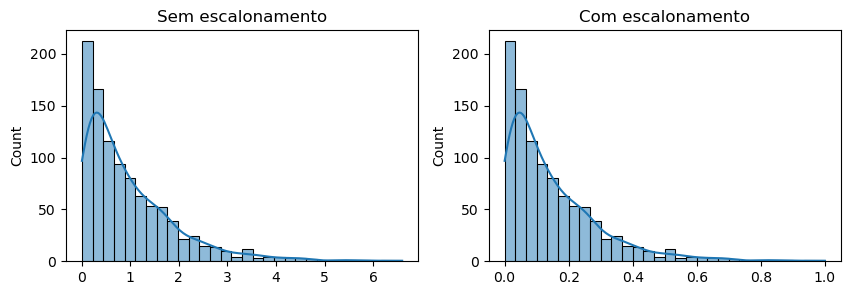

In [12]:
#Para garantir reprodutibilidade
np.random.seed(10)

#Gerando dados aleatórios
dados_aleatorios = np.random.exponential(size = 1000)

#Escalando os dados aleatórios
dados_escalados = minmax_scaling(dados_aleatorios, columns = [0])

#Plotando os gráficos
fig, ax = plt.subplots(1, 2, figsize = (10,3))
sns.histplot(data = dados_aleatorios, ax=ax[0], kde = True, legend = False)
ax[0].set_title('Sem escalonamento')
sns.histplot(data = dados_escalados, ax=ax[1], kde = True, legend = False)
ax[1].set_title('Com escalonamento')

## Normalização

Text(0.5, 1.0, 'Normalizado')

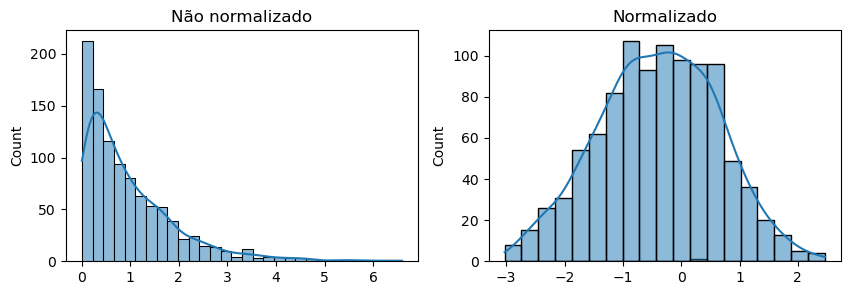

In [13]:
#Normalizando os dados
dados_normalizados = stats.boxcox(dados_aleatorios)

#Plotando os dados não normalizados e os normalizados para comparação
fig, ax = plt.subplots(1 ,2, figsize = (10,3))
sns.histplot(data = dados_aleatorios,ax = ax[0] , kde = True, legend = False)
ax[0].set_title('Não normalizado')
sns.histplot(data = dados_normalizados, ax = ax[1], kde = True, legend = False)
ax[1].set_title('Normalizado')

# Analisando datas

In [14]:
import datetime

In [15]:
catalog = r"C:\Users\marco\Dropbox\PC\Desktop\Estudo_Bibliotecas\Arquivos\catalog.csv"

In [16]:
#Visualizando apenas a coluna de datas
catalogo = pd.read_csv(catalog)
catalogo.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [17]:
#Corrigindo o formato dos dados para data
catalogo['data corrigida'] = pd.to_datetime(catalogo['date'], format = '%m/%d/%y')
catalogo['data corrigida'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: data corrigida, dtype: datetime64[ns]

In [18]:
#Identificando os dias, meses e anos
dias_do_mes = catalogo['data corrigida'].dt.day #Mostrando o dia
meses_do_ano = catalogo['data corrigida'].dt.month #Mostrando o mês
anos = catalogo['data corrigida'].dt.year #Mostrando o ano

print('Dias do mês\n', dias_do_mes.head(), '\n')
print('Meses do ano\n', meses_do_ano.head(), '\n')
print('Anos\n', anos.head())

Dias do mês
 0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: data corrigida, dtype: float64 

Meses do ano
 0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: data corrigida, dtype: float64 

Anos
 0    2007.0
1    2007.0
2    2007.0
3    2007.0
4    2007.0
Name: data corrigida, dtype: float64


<Axes: title={'center': 'Dias do mês'}, xlabel='data corrigida', ylabel='Count'>

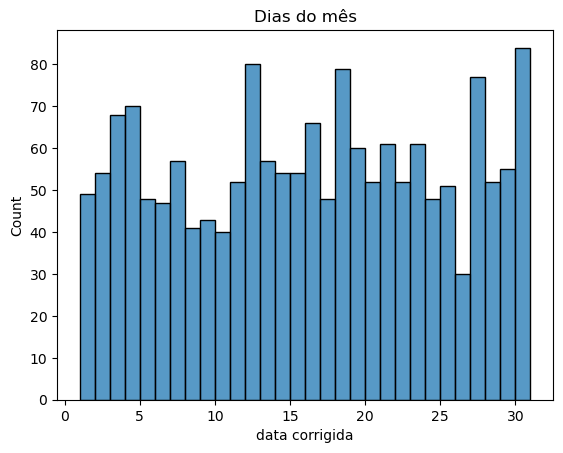

In [19]:
#Plotando os dias para confirmar se o método foi eficiente
dias_do_mes = dias_do_mes.dropna()
plt.title('Dias do mês')
sns.histplot(data = dias_do_mes, bins = 30)

# Codificação de caracteres

In [20]:
import charset_normalizer

## Tipagem dos dados

In [21]:
#Tipo string
texto = "Símbolo da libra: £"

print(texto)
type(texto)

Símbolo da libra: £


str

In [22]:
#Tipo byte
codificado = texto.encode("utf-8", errors="replace")


print(codificado)
type(codificado)

b'S\xc3\xadmbolo da libra: \xc2\xa3'


bytes

In [23]:
#Decodificando o byte
print(codificado.decode('utf-8'))

Símbolo da libra: £


## Identificando a codificação do arquivo

In [24]:
#Analisando as primeiras 10.000 linhas
with open (catalog, 'rb') as rawdata:
    resultado = charset_normalizer.detect(rawdata.read(10000))

#Checando a codificação
print (resultado)

{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}


# Entrada de dados inconsistentes

In [25]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

C:\Users\marco\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [26]:
professors = r"C:\Users\marco\Dropbox\PC\Desktop\Estudo_Bibliotecas\Arquivos\pakistan_intellectual_capital.csv"

In [27]:
professores = pd.read_csv(professors, encoding = 'utf-8')
professores.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


## Pré-processamento de texto

In [28]:
#Identificando a formatação dos dados
professores['Country'].value_counts().sort_index()

 Germany                2
 New Zealand            1
 Sweden                 1
 USA                    3
Australia              10
Austria                20
Canada                  6
China                  16
Finland                 1
France                 23
Greece                  1
HongKong                1
Ireland                 3
Italy                  17
Japan                   3
Macau                   1
Malaysia               25
Mauritius               1
Netherland              6
New Zealand             1
Norway                  3
Pakistan              776
Portugal                2
Russian Federation      1
Saudi Arabia            1
Scotland                1
Singapore               3
South Korea             8
SouthKorea              7
Spain                   3
Sweden                 16
Thailand               12
Turkey                  1
UK                     92
USA                    42
USofA                  10
Urbana                  1
germany                21
Name: Countr

### Corrigindo a formatação

In [29]:
#Passando os nomes para minúsculo
professores['Country'] = professores['Country'].str.lower() 

#Removendo os espaços iniciais
professores['Country'] = professores['Country'].str.strip()

professores['Country'].value_counts().sort_index()

australia              10
austria                20
canada                  6
china                  16
finland                 1
france                 23
germany                23
greece                  1
hongkong                1
ireland                 3
italy                  17
japan                   3
macau                   1
malaysia               25
mauritius               1
netherland              6
new zealand             2
norway                  3
pakistan              776
portugal                2
russian federation      1
saudi arabia            1
scotland                1
singapore               3
south korea             8
southkorea              7
spain                   3
sweden                 17
thailand               12
turkey                  1
uk                     92
urbana                  1
usa                    45
usofa                  10
Name: Country, dtype: int64

### Identificando palavras parecidas

In [30]:
#Identificando as 5 palavras mais próximas de 'usa'
identificando_usa = fuzzywuzzy.process.extract('usa', 
                                               professores['Country'].unique(), 
                                               limit = 5, 
                                               scorer = fuzzywuzzy.fuzz.token_sort_ratio)
identificando_usa

[('usa', 100),
 ('usofa', 75),
 ('austria', 60),
 ('australia', 50),
 ('spain', 50)]

In [31]:
#Definindo a função para substituir os valores
def corrigindo_nomes(dataframe, coluna, match_de_string, nivel_proximidade):
    #Recebendo uma lista de strings unicas
    strings = dataframe[coluna].unique()
    
    #Encontrando as 5 palavras mais próximas do input
    matches = fuzzywuzzy.process.extract(match_de_string, 
                                       strings, 
                                       limit = 5,
                                      scorer = fuzzywuzzy.fuzz.token_sort_ratio)
    
    #Recebendo apenas os valores de match > 90
    matches_proximos = [match[0] for match in matches if match[1] >= nivel_proximidade]
    
    #Recebendo as linhas que apresentam as strings encontradas
    linhas_strings = dataframe[coluna].isin(matches_proximos)
    
    #Substituindo todas as linhas com match próximo do valor de input
    dataframe.loc[linhas_strings, coluna] = match_de_string
    
    #Para saber se o processo foi finalizado
    print('Finalizado')

In [32]:
#Corrigindo o nome próximos de usa
corrigindo_nomes(dataframe = professores, 
                 coluna = 'Country',
                match_de_string = 'usa',
                nivel_proximidade = 75)

#Corrigindo o nome próximos de south korea
corrigindo_nomes(dataframe = professores, 
                 coluna = 'Country',
                match_de_string = 'south korea',
                nivel_proximidade = 48)

Finalizado
Finalizado


In [33]:
professores['Country'].value_counts().sort_index()

australia              10
austria                20
canada                  6
china                  16
finland                 1
france                 23
germany                23
greece                  1
hongkong                1
ireland                 3
italy                  17
japan                   3
macau                   1
malaysia               25
mauritius               1
netherland              6
new zealand             2
norway                  3
pakistan              776
portugal                2
russian federation      1
saudi arabia            1
scotland                1
singapore               3
south korea            15
spain                   3
sweden                 17
thailand               12
turkey                  1
uk                     92
urbana                  1
usa                    55
Name: Country, dtype: int64